Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


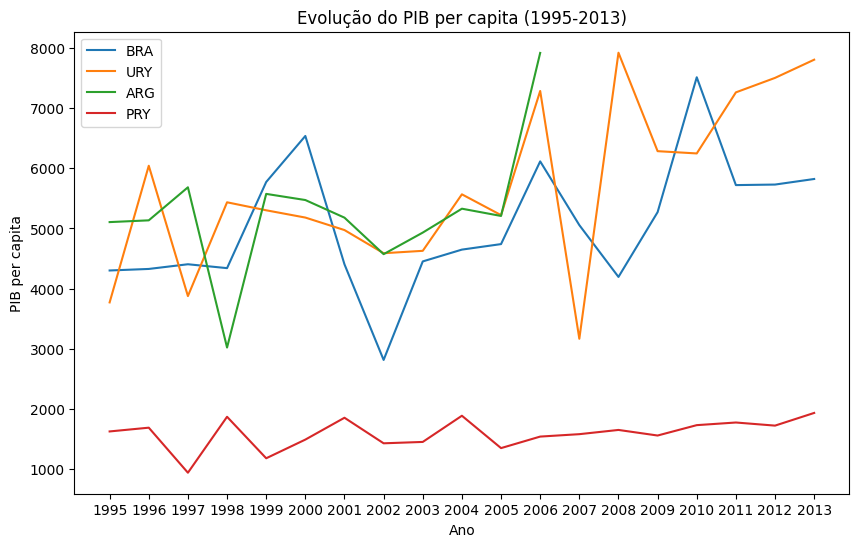

In [7]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

# Configurações
caminho = '/content/gdrive/MyDrive/'
conjunto_de_dados = 'dataset_bancomundial_1.csv'
caminho_conjunto_de_dados = caminho + conjunto_de_dados
paises_conesul = ['BRA', 'URY', 'ARG', 'PRY']
anos = [str(ano) for ano in range(1995, 2014)]
colunas = ['Country Name', 'Country Code'] + anos

# Carrega o conjunto de dados
dados_banco = pd.read_csv(caminho_conjunto_de_dados, sep=';', decimal=',')

# Filtra os dados dos países do ConeSul
dados_conesul = dados_banco[dados_banco['Country Code'].isin(paises_conesul)]

# Filtra por PIB per capita e seleciona as colunas desejadas
pib_per_capita = dados_conesul[dados_conesul['Indicator Name'].str.contains('GDP per capita')][colunas]

# Plotando a evolução do indicador PIB per capita para os países do ConeSul
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for pais in paises_conesul:
    dados_pais = pib_per_capita[pib_per_capita['Country Code'] == pais]
    plt.plot(anos, dados_pais[anos].values[0], label=pais)

plt.xlabel('Ano')
plt.ylabel('PIB per capita')
plt.title('Evolução do PIB per capita (1995-2013)')
plt.legend()
plt.show()
